In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [2]:
df=pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")

In [3]:
data=df.copy()

In [4]:
data.shape

(129971, 14)

In [5]:
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [6]:
data.describe(include="all")

Unnamed: 0 country  \
count   129971.000000  129908   
unique            NaN      43   
top               NaN      US   
freq              NaN   54504   
mean     64985.000000     NaN   
std      37519.540256     NaN   
min          0.000000     NaN   
25%      32492.500000     NaN   
50%      64985.000000     NaN   
75%      97477.500000     NaN   
max     129970.000000     NaN   

                                              description designation  \
count                                              129971       92506   
unique                                             119955       37979   
top     Seductively tart in lemon pith, cranberry and ...     Reserve   
freq                                                    3        2009   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

               points          price    province     region_1       region_2  \
count   129971.000000  120975.000000      129908       108724          50511   
unique            NaN            NaN         425         1229             17   
top               NaN            NaN  California  Napa Valley  Central Coast   
freq              NaN            NaN       36247         4480          11065   
mean        88.447138      35.363389         NaN          NaN            NaN   
std          3.039730      41.022218         NaN          NaN            NaN   
min         80.000000       4.000000         NaN          NaN            NaN   
25%         86.000000      17.000000         NaN          NaN            NaN   
50%         88.000000      25.000000         NaN          NaN            NaN   
75%         91.000000      42.000000         NaN          NaN            NaN   
max        100.000000    3300.000000         NaN          NaN            NaN   

       taster_name taster_twitter_handle  \
count       103727                 98758   
unique          19                    15   
top     Roger Voss            @vossroger   
freq         25514                 25514   
mean           NaN                   NaN   
std            NaN                   NaN   
min            NaN                   NaN   
25%            NaN                   NaN   
50%            NaN                   NaN   
75%            NaN                   NaN   
max            NaN                   NaN   

                                                    title     variety  \
count                                              129971      129970   
unique                                             118840         707   
top     Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...  Pinot Noir   
freq                                                   11       13272   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

                    winery  
count               129971  
unique               16757  
top     Wines & Winemakers  
freq                   222  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

### This is for hide warning messages

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Remove Extra Columns

In [8]:
df=df.drop(columns=["Unnamed: 0","country","designation","province","region_1","region_2","taster_name","taster_twitter_handle","title","variety","winery"],axis=1)

## After removing extra columns

In [9]:
df.head(100)

description  points  price
0   Aromas include tropical fruit, broom, brimston...      87    NaN
1   This is ripe and fruity, a wine that is smooth...      87   15.0
2   Tart and snappy, the flavors of lime flesh and...      87   14.0
3   Pineapple rind, lemon pith and orange blossom ...      87   13.0
4   Much like the regular bottling from 2012, this...      87   65.0
..                                                ...     ...    ...
95  This is a dense wine, packed with both tannins...      88   20.0
96  The wine comes from one of the cru estates fol...      88   18.0
97  A wisp of bramble extends a savory tone from n...      88   20.0
98  Forest floor, menthol, espresso, cranberry and...      88   30.0
99  This blends 20% each of all five red-Bordeaux ...      88   75.0

[100 rows x 3 columns]

# Check NULL values

In [10]:
Missing=df.isnull().sum()
Missing

description       0
points            0
price          8996
dtype: int64

#### As we see that price column having 8996 null values so we replace null values with the mean of price

In [11]:
df['price']=df['price'].replace(np.NaN,'35')

In [12]:
Missing=df.isnull().sum()
Missing

description    0
points         0
price          0
dtype: int64

##### Now, There is no null values in the data

## Reduce data

In [13]:
df80=df[df['points']==80]
df81=df[df['points']==81]
df82=df[df['points']==82]
df83=df[df['points']==83]
df84=df[df['points']==84]
df85=df[df['points']==85]
df86=df[df['points']==86]
df87=df[df['points']==87]
df88=df[df['points']==88]
df89=df[df['points']==89]
df90=df[df['points']==90]
df91=df[df['points']==91]
df92=df[df['points']==92]
df93=df[df['points']==93]
df94=df[df['points']==94]
df95=df[df['points']==95]
df96=df[df['points']==96]
df97=df[df['points']==97]
df98=df[df['points']==98]
df99=df[df['points']==99]
df100=df[df['points']==100]


In [14]:
df80.shape,df81.shape,df82.shape,df83.shape,df84.shape,df85.shape,df86.shape,df87.shape,df88.shape,df89.shape,df90.shape,df91.shape,df92.shape,df93.shape,df94.shape,df95.shape,df96.shape,df97.shape,df98.shape,df99.shape,df100.shape

((397, 3),
 (692, 3),
 (1836, 3),
 (3025, 3),
 (6480, 3),
 (9530, 3),
 (12600, 3),
 (16933, 3),
 (17207, 3),
 (12226, 3),
 (15410, 3),
 (11359, 3),
 (9613, 3),
 (6489, 3),
 (3758, 3),
 (1535, 3),
 (523, 3),
 (229, 3),
 (77, 3),
 (33, 3),
 (19, 3))

### As data set having one lakh+ entries so we reduce it by 10

In [15]:
df80=df80[:int(df80.shape[0]/10)]
df81=df81[:int(df81.shape[0]/10)]
df82=df82[:int(df82.shape[0]/10)]
df83=df83[:int(df83.shape[0]/10)]
df84=df84[:int(df84.shape[0]/10)]
df85=df85[:int(df85.shape[0]/10)]
df86=df86[:int(df86.shape[0]/10)]
df87=df87[:int(df87.shape[0]/10)]
df88=df88[:int(df88.shape[0]/10)]
df89=df89[:int(df89.shape[0]/10)]
df90=df90[:int(df90.shape[0]/10)]
df91=df91[:int(df91.shape[0]/10)]
df92=df92[:int(df92.shape[0]/10)]
df93=df93[:int(df93.shape[0]/10)]
df94=df94[:int(df94.shape[0]/10)]
df95=df95[:int(df95.shape[0]/10)]
df96=df96[:int(df96.shape[0]/10)]
df97=df97[:int(df97.shape[0]/10)]
df98=df98[:int(df98.shape[0]/10)]
df99=df99[:int(df99.shape[0]/10)]
df100=df100[:int(df100.shape[0]/10)]



In [16]:
df80.shape,df81.shape,df82.shape,df83.shape,df84.shape,df85.shape,df86.shape,df87.shape,df88.shape,df89.shape,df90.shape,df91.shape,df92.shape,df93.shape,df94.shape,df95.shape,df96.shape,df97.shape,df98.shape,df99.shape,df100.shape

((39, 3),
 (69, 3),
 (183, 3),
 (302, 3),
 (648, 3),
 (953, 3),
 (1260, 3),
 (1693, 3),
 (1720, 3),
 (1222, 3),
 (1541, 3),
 (1135, 3),
 (961, 3),
 (648, 3),
 (375, 3),
 (153, 3),
 (52, 3),
 (22, 3),
 (7, 3),
 (3, 3),
 (1, 3))

### Now,Combine data

In [17]:
finaldata=pd.concat([df80,df81,df82,df83,df84,df85,df86,df87,df88,df89,df90,df91,df92,df93,df94,df95,df96,df97,df98,df99,df100],axis=0)

In [18]:
finaldata.shape

(12987, 3)

In [19]:
finaldata.head()

description  points price
344   Aromas of pumpkin, squash and corn chips are s...      80  19.0
3640  Aromas of strawberry sherbet are followed by s...      80   8.0
3641  Fluffy, sweet aromas of peach, pear and vanill...      80  15.0
4556  There's a thorny, almost raw quality of fruit ...      80  12.0
4557  With dusty, candied aromas, the bouquet on thi...      80  14.0

# **Data Cleaning**

## Remove Hashtags

In [20]:
finaldata['description'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

## Remove mentions

In [21]:
finaldata['description'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

## Remove URLs

In [22]:
finaldata['description'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

## Convert into lower case letters

In [23]:
finaldata['description']=finaldata['description'].str.lower()

## Remove Stopwords

In [24]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

finaldata['description'] = finaldata['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## Remove Punctuations

In [25]:
finaldata["description"] = finaldata['description'].str.replace('[^\w\s]','', regex = True)

## Stemming

In [26]:
finaldata=finaldata.reset_index()
finaldata

index                                        description  points  price
0        344  aromas pumpkin squash corn chips stale invitin...      80   19.0
1       3640  aromas strawberry sherbet followed sweet candy...      80    8.0
2       3641  fluffy sweet aromas peach pear vanilla good ge...      80   15.0
3       4556  theres thorny almost raw quality fruit backed ...      80   12.0
4       4557  dusty candied aromas bouquet semisweet cava sc...      80   14.0
...      ...                                                ...     ...    ...
12982  16522  layers upon layers spicy saffron peach honey c...      98  775.0
12983   1556  flagship wine quilceda creek offers exotic sce...      99  125.0
12984   1557  stupendous pinot noir showing beautifully vine...      99   94.0
12985  35517  one italys iconic bottlings 2012 sassicaia dro...      99  235.0
12986    345  wine contains material 100 years old shows sig...     100  350.0

[12987 rows x 4 columns]

#### Remove extra index column

In [27]:
finaldata=finaldata.drop(columns=["index"],axis=1)

In [28]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from functools import reduce

ps = PorterStemmer()
for i in range(1,len(finaldata["description"])):
    sentance=sent_tokenize(finaldata["description"][i])
   
    words = word_tokenize(str(sentance),language='english',)

# using reduce to apply stemmer to each word and join them back into a string
    finaldata["description"][i] = reduce(lambda x, y: x + " " + ps.stem(y), words, "")




# Randomize Data

In [29]:
finaldata=finaldata.sample(frac=1,replace=True)

# EDA for Final Data set

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
points=finaldata["points"].value_counts()
points

88     1709
87     1686
90     1578
86     1253
89     1220
91     1087
92      973
85      953
93      667
84      626
94      403
83      282
82      183
95      166
81       65
96       60
80       36
97       29
98        5
99        5
100       1
Name: points, dtype: int64

In [32]:
tickvalues=['80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100']

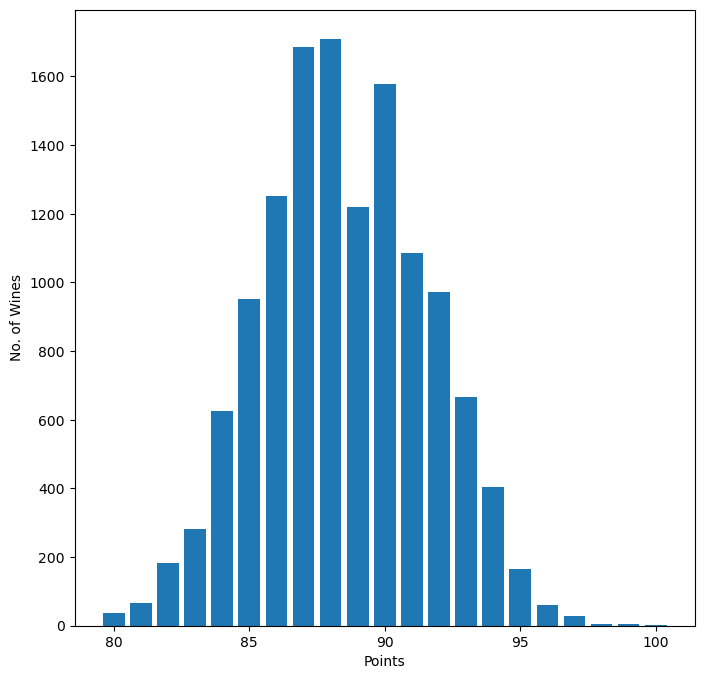

In [33]:
plt.figure(figsize=(8,8))
plt.bar(points.index,points.values)
plt.xlabel("Points")
plt.ylabel("No. of Wines")

plt.show()

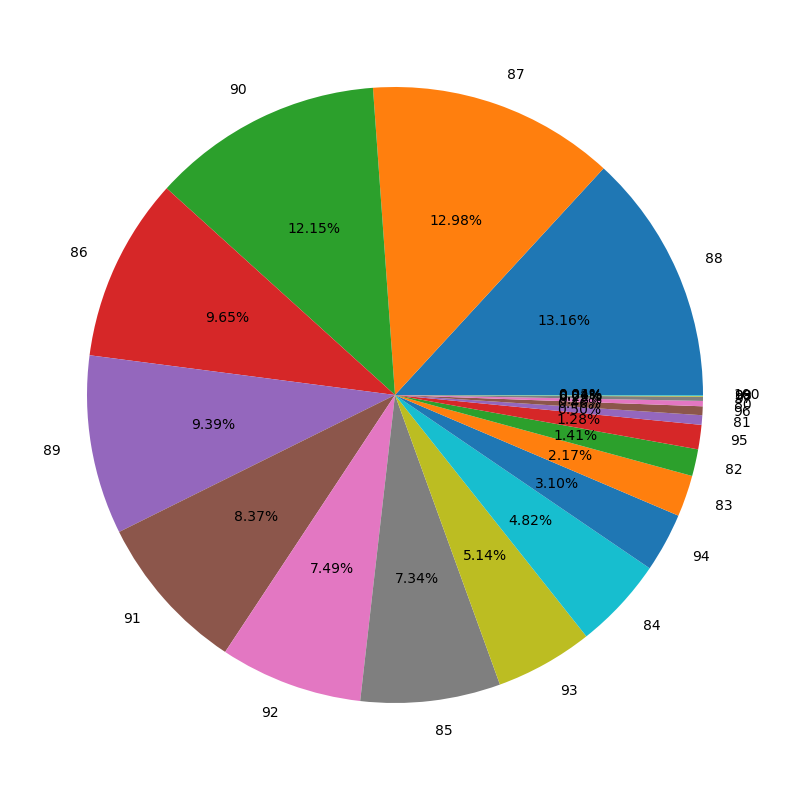

In [34]:
plt.figure(figsize=(10, 10))
plt.pie(x=points.values,labels=points.index ,autopct='%.2f%%')
# plt.title('The Difference in the Type of Ratings')
plt.show()

In [35]:
price=finaldata["price"].value_counts()
price

35       920
20.0     705
15.0     600
25.0     558
30.0     499
        ... 
101.0      1
152.0      1
107.0      1
230.0      1
127.0      1
Name: price, Length: 171, dtype: int64

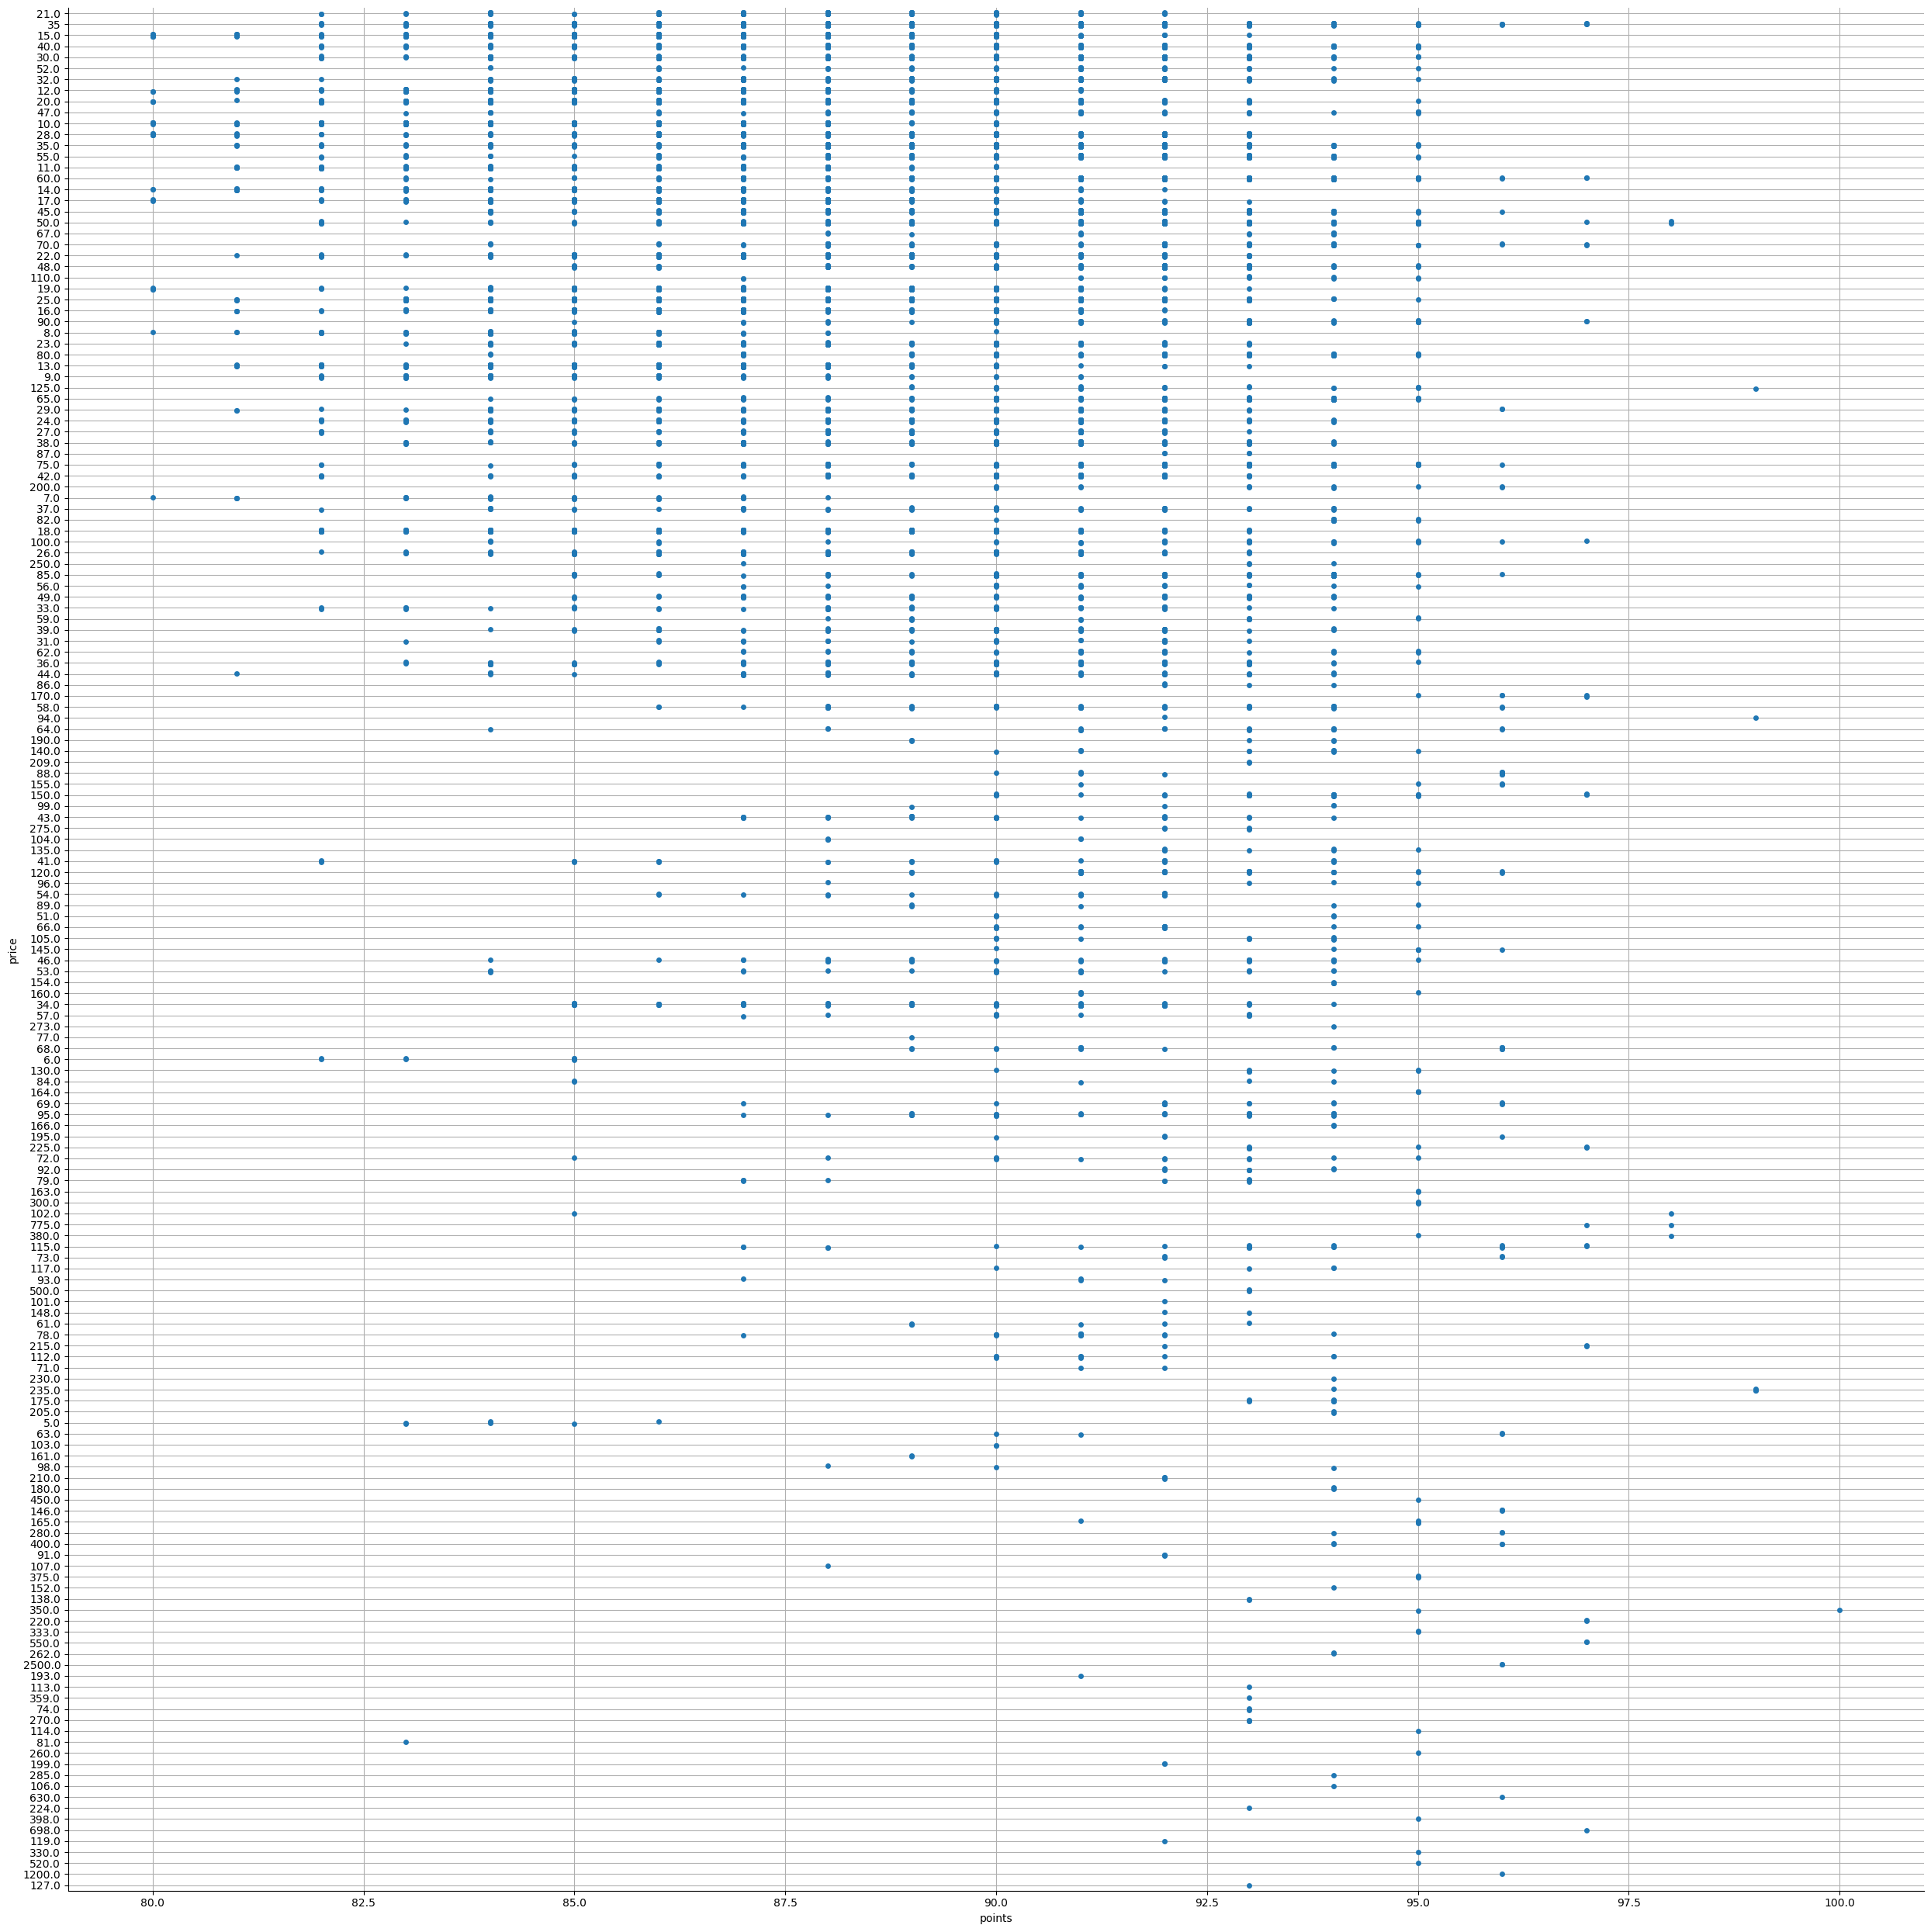

In [36]:
sns.catplot(y='price',x='points',data=finaldata,height=25)
plt.grid()

## Word Cloud

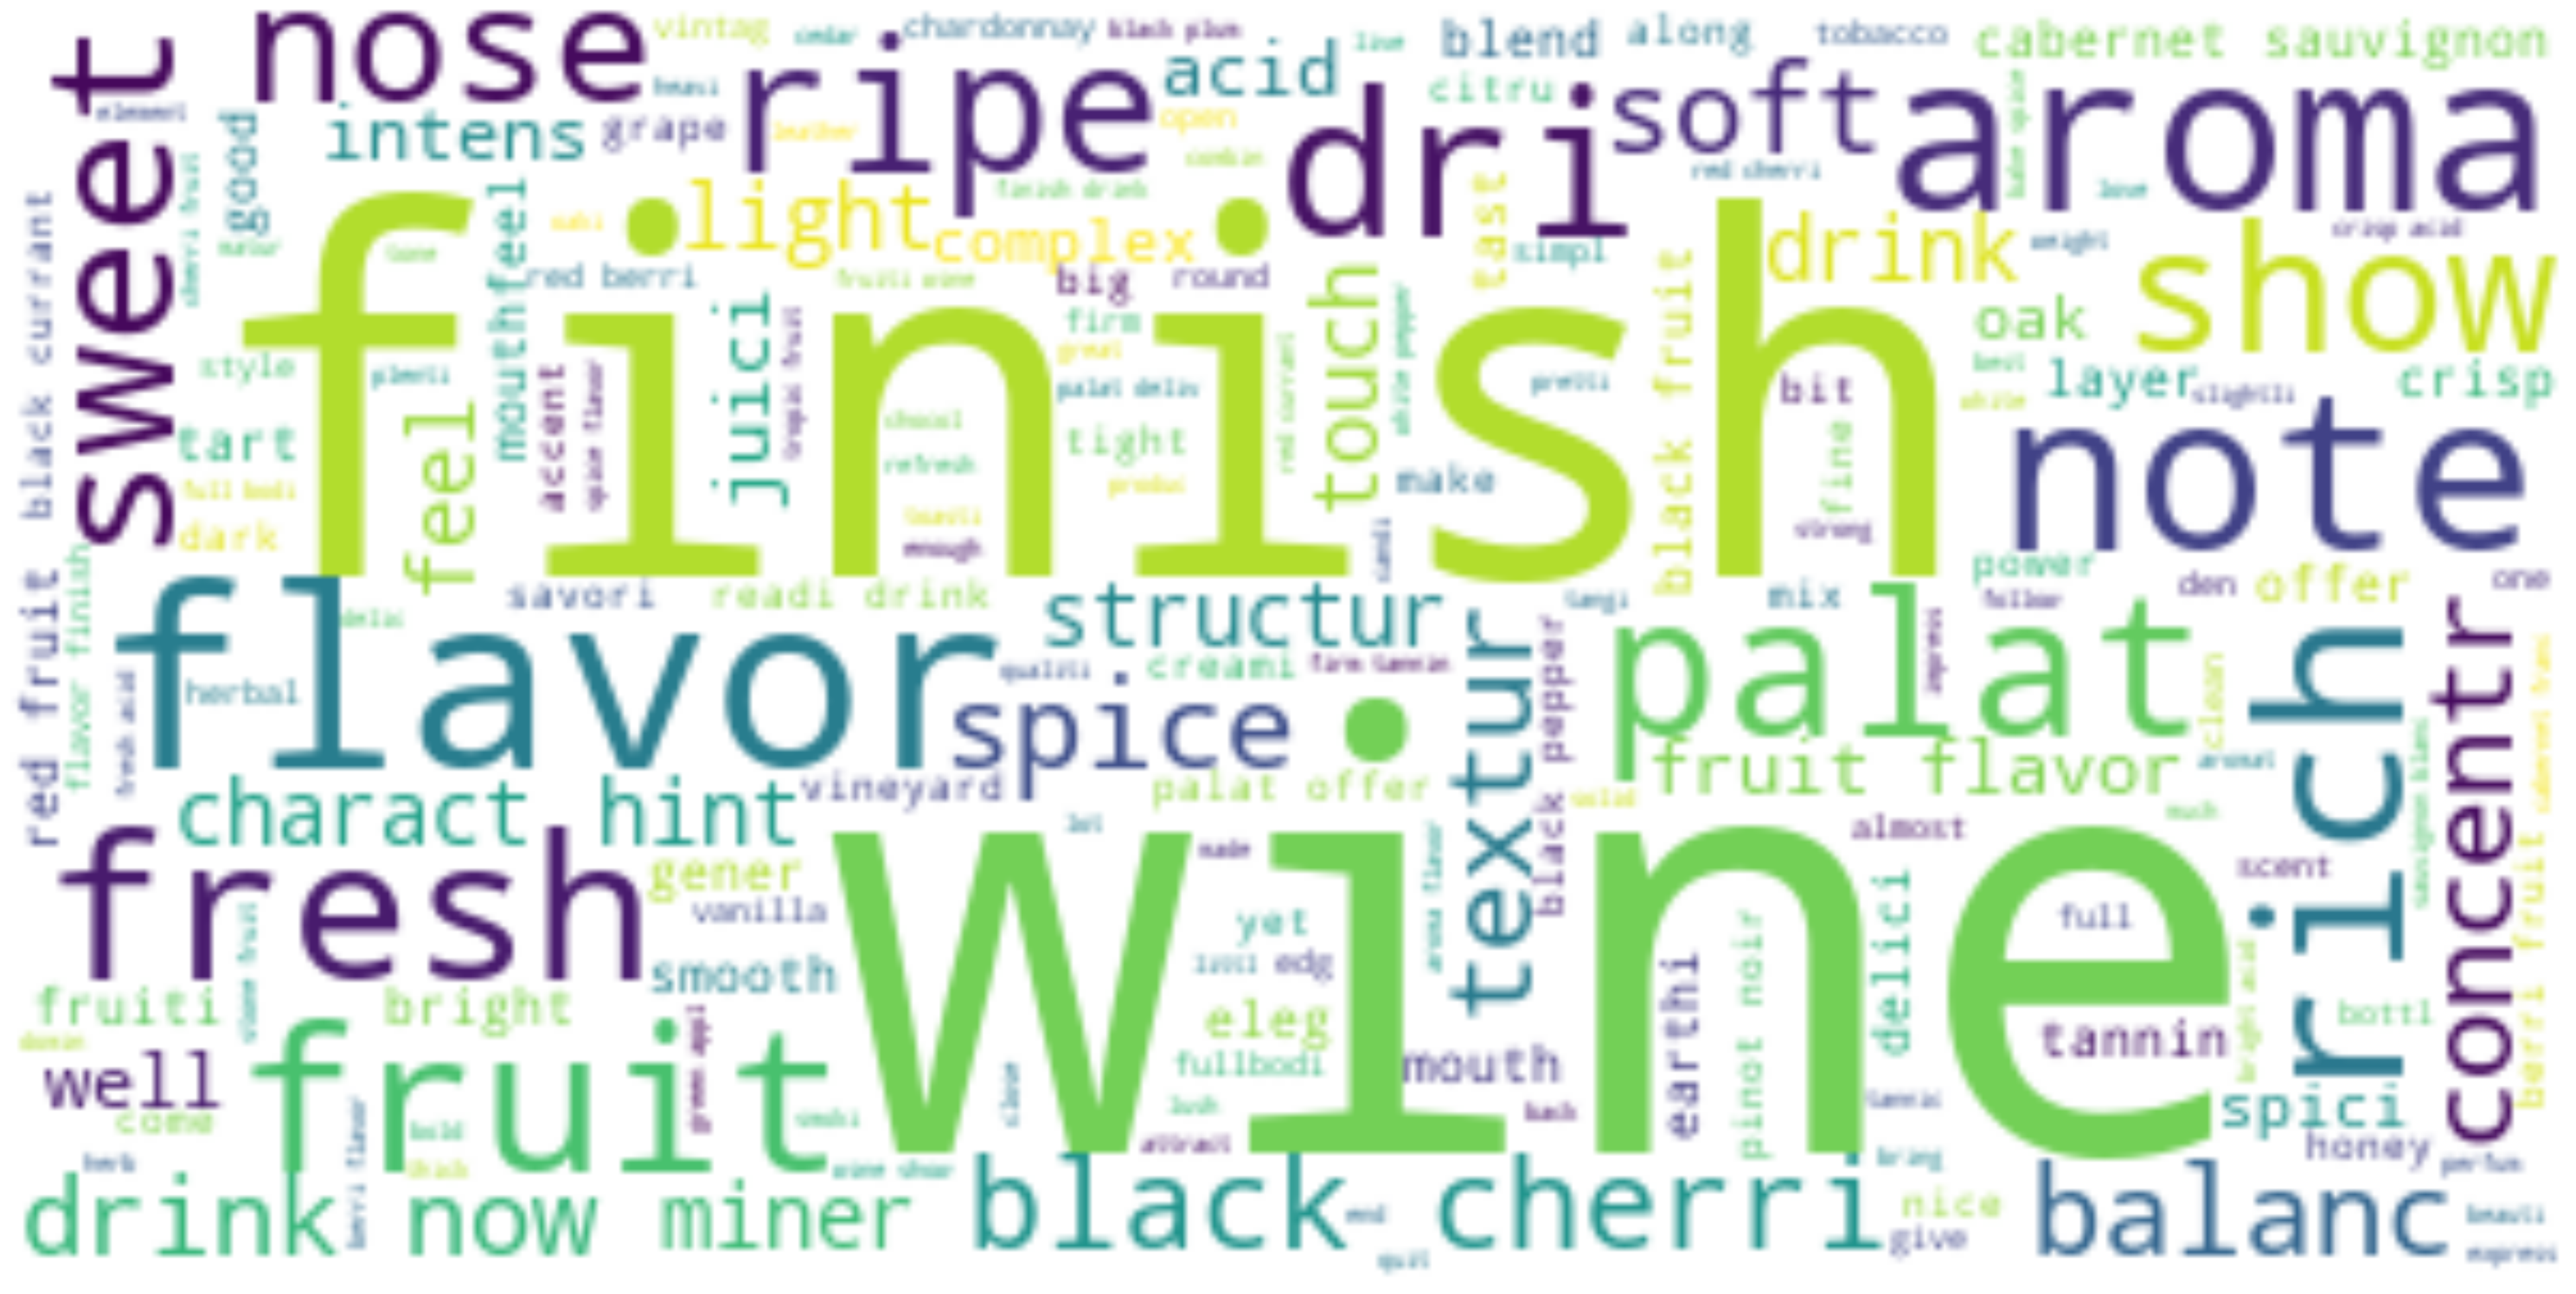

In [37]:
from wordcloud import WordCloud, STOPWORDS

plt.rcParams['figure.figsize'] = (50, 50)

#assigning shape to the word cloud
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(' '.join(finaldata['description']))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Vectorization**

In [38]:
y = finaldata['points']
x = finaldata['description']
z = finaldata['price']
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
    
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
x = pd.DataFrame(denselist1, columns=feature_names1)

# **Split Data**

In [39]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [40]:
accuracy = {'TF-IDF':[]}

# **Apply Models**

In [41]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

## Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linearregressor_LR_tf = LinearRegression()
linearregressor_LR_tf.fit(X_temp, y_temp)

LinearRegression()

In [44]:
y_predict_LinearR_tf = linearregressor_LR_tf.predict(X_test)
y_predict_LinearR_tf

array([86.75527189, 90.88136704, 90.40160153, ..., 93.27026442,
       85.85226856, 85.42533275])

In [45]:
a=(linearregressor_LR_tf.score(X_test, y_test))*100
a

62.4160282727467

In [46]:
accuracy['TF-IDF'].append(a)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)


LogisticRegression(solver='newton-cg')

In [48]:
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
y_predict_LR_tf

array([85, 90, 89, ..., 94, 88, 84])

In [49]:
a=(regressor_LR_tf.score(X_test, y_test))*100
a

34.257120862201695

In [50]:
accuracy['TF-IDF'].append(a)

In [51]:
print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[  0   0   0   0   2   2   1   0   1   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   2   0   1   2   2   4   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   6   0   8   2   3   5   4   0   0   0   1   0   0   0   0   0
    0]
 [  0   0   1   2   7  15  17  18   6   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   3  40  18  16  34  13   2   3   2   0   0   0   0   0   0
    0]
 [  0   0   0   1  15  60  34  45  28   5   7   1   0   0   0   0   0   0
    0]
 [  0   0   0   0   8  22  93  68  42  12  16   4   3   0   0   0   0   0
    0]
 [  0   0   0   1   4  10  41 163  47  19  29  12   4   0   0   0   0   0
    0]
 [  0   0   0   1   1   7  23  68 140  11  54  10   6   9   1   0   0   0
    0]
 [  0   0   0   0   1   5  10  42  45  67  35  10   9   7   0   0   0   0
    0]
 [  0   0   0   0   2   5  11  33  50  28 137  26  11   2   1   0   0   0
    0]
 [  0   0   0   0   0   3   8  15  36  18  41  57  18  10   5   0   0   0
    0]
 [  0   0   0   0   0   2   

## Dicision Tree

In [52]:
from sklearn import tree

In [53]:
model_DT_tf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)

DecisionTreeClassifier(max_depth=2)

In [54]:
y_predict_DT_tf = model_DT_tf.predict(X_test)
y_predict_DT_tf

array([88, 90, 90, ..., 90, 90, 88])

In [55]:
a=(model_DT_tf.score(X_test,y_test))*100
a

14.857582755966128

In [56]:
accuracy['TF-IDF'].append(a)

In [57]:
print(metrics.confusion_matrix(y_test, y_predict_DT_tf))
print(metrics.classification_report(y_test, y_predict_DT_tf))
print(metrics.accuracy_score(y_test, y_predict_DT_tf))

[[  0   0   0   0   0   0   0   2   3   0   2   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   1   0   0   2   2   0   7   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   4   0   0   2  13   0  10   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   6   0   0  10  25   0  26   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   4   0   0  19  54   0  54   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  23  64   0 109   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  41  85   0 142   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   1   0   0  57  82   0 190   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  44  87   0 200   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  34  53   0 144   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  24  44   0 238   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  16  27   0 168   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)

RandomForestClassifier(max_features='log2')

In [60]:
y_predict_RF_tf = model_RF_tf.predict(X_test)
y_predict_RF_tf

array([85, 91, 92, ..., 93, 88, 84])

In [61]:
a=(model_RF_tf.score(X_test,y_test))*100
a

63.279445727482674

In [62]:
accuracy['TF-IDF'].append(a)

In [63]:
print(metrics.confusion_matrix(y_test, y_predict_RF_tf))
print(metrics.classification_report(y_test, y_predict_RF_tf))
print(metrics.accuracy_score(y_test, y_predict_RF_tf))

[[  5   0   0   0   0   0   1   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   4   1   1   2   0   0   2   0   0   2   0   0   0   0   0   0   0
    0]
 [  0   0  16   2   2   2   1   3   2   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0  38   3   4   7   8   5   0   2   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  88   7  11  18   3   1   3   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   4 115  13  36  23   2   2   1   0   0   0   0   0   0
    0]
 [  0   0   0   0   2   7 161  60  22   2  10   1   2   1   0   0   0   0
    0]
 [  0   0   0   0   1   9  11 252  30   4  16   6   1   0   0   0   0   0
    0]
 [  0   0   0   0   0   1  11  51 214  12  34   1   7   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   8  20  36 127  28   5   6   1   0   0   0   0
    0]
 [  0   0   0   0   0   4  10  24  30   9 205  16   6   2   0   0   0   0
    0]
 [  0   0   0   0   0   2   1  10  12   5  31 139   5   6   0   0   0   0
    0]
 [  0   0   0   0   0   0   

## K-Neighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [66]:
y_predict_KN_tf = model_KN_tf.predict(X_test)
y_predict_KN_tf

array([85, 84, 89, ..., 86, 88, 84])

In [67]:
a=(model_KN_tf.score(X_test,y_test))*100
a

59.62278675904542

In [68]:
accuracy['TF-IDF'].append(a)

In [69]:
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

[[  5   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  1   5   3   1   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   3  18   3   2   1   0   2   0   0   0   0   0   0   0   0   0   0
    0]
 [  2   4   6  44   7   0   1   3   0   0   0   0   0   0   0   0   0   0
    0]
 [  5   8   7   3  93   4   5   6   0   0   0   0   0   0   0   0   0   0
    0]
 [  1   4   8  11  14 120  12  17   4   3   1   1   0   0   0   0   0   0
    0]
 [  2   5  13  22  19  12 139  39   6   7   3   1   0   0   0   0   0   0
    0]
 [  4  11   3  16   8   5  15 240   7   9   7   2   2   0   1   0   0   0
    0]
 [  4   8   3  17  23  12  11  42 186   8  10   2   2   1   1   0   0   0
    1]
 [  2   7   8  10  10   4  12  29  12 127   6   1   3   0   0   0   0   0
    0]
 [  4   6   4  14  22   6   6  37  15   2 180   6   2   1   1   0   0   0
    0]
 [  1   9   5   4  10   1   7  31   9   0   6 123   1   0   1   1   2   0
    0]
 [  0   4   5   9  10   2   

# **Hyperperameter Tunning**

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [71]:
# define parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=regressor_LR_tf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.276751 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.271940 (0.011638) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.276366 (0.012887) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.264434 (0.010894) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.275597 (0.007592) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.276751 (0.008911) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.274249 (0.008712) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.234796 (0.006418) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.234796 (0.006418) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.231524 (0.007173) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.169746 (0.007364) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.169746 (0.007364) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.169554 (0.007643) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.148961 (0.010520) with: {'

## KNN

In [72]:
# define parameters
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model_KN_tf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.265396 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
0.251925 (0.006016) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.251925 (0.006016) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.167821 (0.015588) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.255966 (0.008503) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.166474 (0.008258) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.261547 (0.009399) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.164357 (0.008786) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.262510 (0.010597) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.163780 (0.008729) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.260393 (0.011131) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.154927

## Random Forest

In [77]:
# define parameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model_RF_tf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.247498 using {'max_features': 'log2', 'n_estimators': 1000}
0.218245 (0.006543) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.238260 (0.001155) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.242494 (0.000000) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.205158 (0.001155) with: {'max_features': 'log2', 'n_estimators': 10}
0.231717 (0.000000) with: {'max_features': 'log2', 'n_estimators': 100}
0.247498 (0.004234) with: {'max_features': 'log2', 'n_estimators': 1000}


# Comparision of Results

In [74]:
model = ['LinR','LogR','DT','RF','KNN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

model   accuracy
0  LinR  62.416028
1  LogR  34.257121
2    DT  14.857583
3    RF  63.279446
4   KNN  59.622787

In [75]:
import matplotlib.pyplot as plt

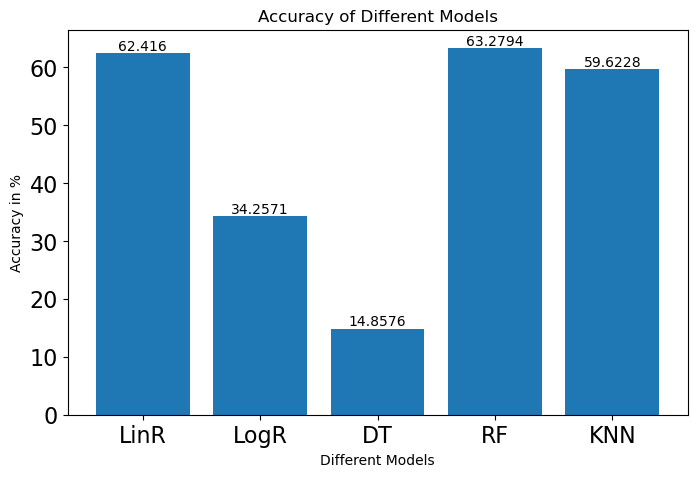

In [76]:
x, y = compare_models['model'],compare_models['accuracy']
ind = np.arange(len(y))
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, y)
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.bar_label(ax.containers[0], horizontalalignment='left')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.title("Accuracy of Different Models")
plt.xlabel("Different Models")
plt.ylabel("Accuracy in %")
plt.show()